Skylar Bitar (261050625):
<br>
Math 317 - Lab 1

<h1><center>Part 1</center></h1>

**1. Explain the workings of the functions *naivelog* and *mylog* in detail. Do not ignore the case when the argument x is between 0 and 1. What is the role of the parameter n?**

In [1]:
def naivelog(x):
  n=15
  y = x
  for i in range(n):
    y = math.sqrt(y)
  l = y-1
  for i in range(n):
    l = l*2
  return l

We start with naivelog: naivelog takes an input x and assigns it to a variable y. It then takes the $\sqrt[32768]{y}$ by taking the $\sqrt{y}$ 15 times (determined by the constant n, which controls for precision) and storing the result back into y after each square root. We then store $\sqrt[32768]{y} - 1$ to a variable l. Finally, we return 32768 * ($\sqrt[32768]{y} - 1$), which is given by continuously multiplying the value of l by 2, 15 times. Notice that this approximates log(x) by taking advantage of the property that ${\displaystyle \ln(x)=\lim _{n\to \infty }n\cdot ({\sqrt[{n}]{x}}-1)}$ where here, n = $2^{15}$. Error will inevitably be introduced by the fact that the property being used is not the best approximation, however it is an approximation of log nonetheless. Now, if we consider the case where 0 $\leq$ x $\leq$ 1, note that the step l = y -1, will result in either 0 or a negative number. Now, consider that log0 is actually undefined. However, in this case l = -1 and we will return -32768, which is completely inaccurate. Thus, it's clear that as x -> 0, naivelog will output an incorrect value as it is not properly handling such cases. In addition, note that for 0 $<$ x $<$ 1, we expect a negative number. However, observe that the answer only becomes negative after  taking the $\sqrt[32768]{y}$, which can lead to some inaccuracies. Also note, the parameter n controls for precision by attempting to bring the number to a smaller range, to make it easier to compute. The higher n is, the larger the number it can bring into the range, as well as, the more precise the outcome will be (since we narrow the range as well).

In [2]:
def mylog(x):
  n=15
  z = x-1
  for i in range(n):
    z = z/(1+math.sqrt(1+z))
  l = z
  for i in range(n):
    l = l*2
  return l

Now for mylog: mylog takes an input x. It stores x - 1 into a variable z. We then calculate $\frac{z}{(1+sqrt(1+z))^{15}}$ by dividing z by $(1+sqrt(1+z))$ 15 times (determined by the constant n, which controls for precision), where we store the result back into z with every division. We then store $\frac{z}{(1+sqrt(1+z))^{15}}$ into l. Finally, we return $\frac{32768z}{(1+sqrt(1+z))^{15}}$, which is given by continuously muliplying the value of l by 2, 15 times. Notice this approximates log by using a reduction of the basic Power series for log(x), 2log(1+z)(as seen in Taylor Series 60), where we work our way up from z (halving our argument to the z <$\frac{x}{2}$ required) towards the whole expression. Now, if we consider the case where 0 $\leq$ x $\leq$ 1, we will still run into issues of ouputting -32768 on input 0, as z would equal -1. Thus, similarly to naivelog, as x-> 0, mylog will output absurd values, and thus larger margin of error. Furthermore, notice that because we can subtract 1 from the input earlier on than in naivelog(x). Since we expect to get a negative number in the range, this will lead to slightly more accurate outputs for numbers 0 $<$ x $<$ 1, when compared to naivelog. Also note, the parameter n controls for precision by attempting to bring the number to a smaller range, to make it easier to compute. The higher n is, the larger the number it can bring into the range, as well as, the more precise the outcome will be (since we narrow the range as well).

 **2. Compute the logarithms of the numbers 1, 2, . . . , 14 by using the functions naivelog and
mylog, and compare the errors with Python’s built-in function math.log taken as the “gold standard.” Change the parameter n to be 15, 20, 25, 30, 35 and see what happens to the errors. Explain, as quantitatively as possible, why the functions naivelog and mylog behave differently.**

For n = 15:


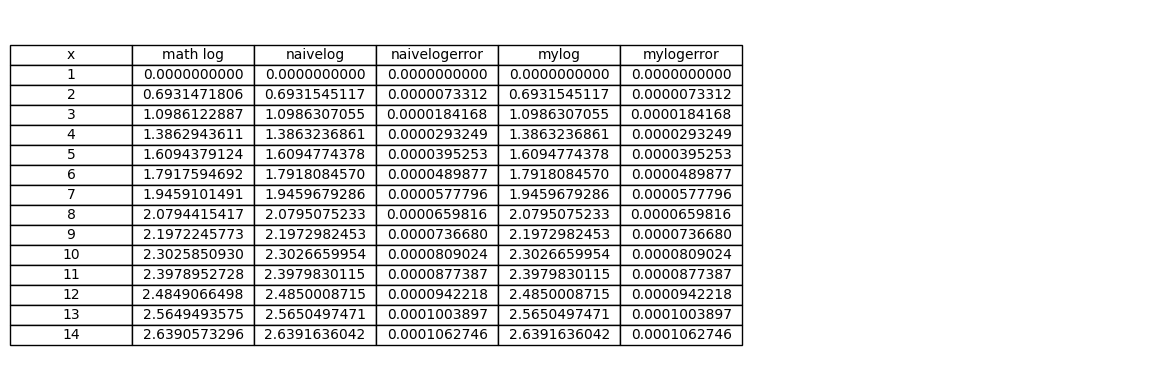

For n = 20:


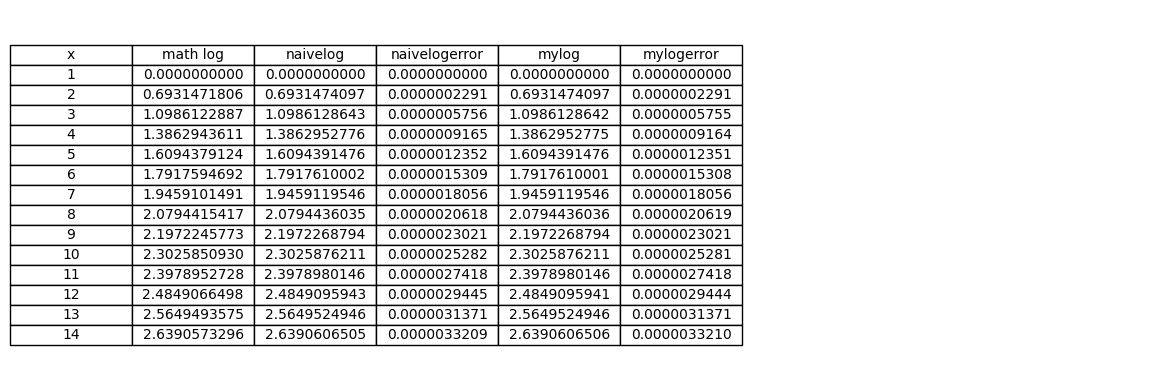

For n = 25:


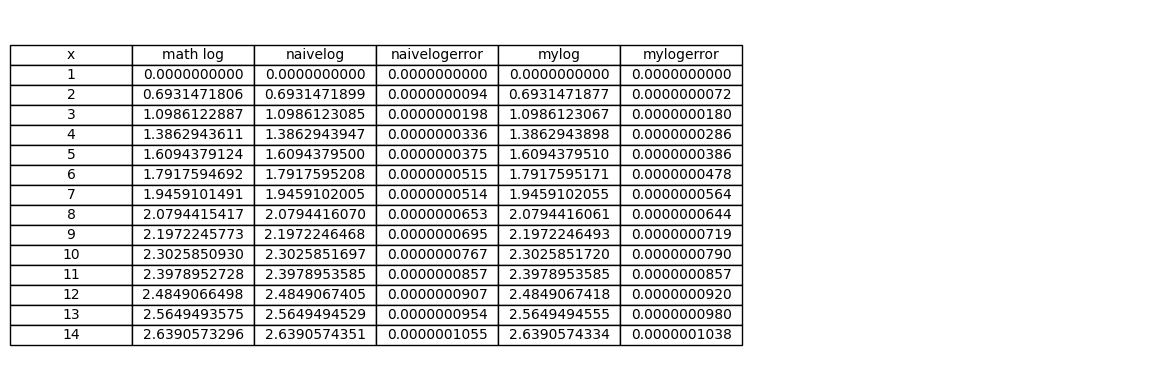

For n = 30:


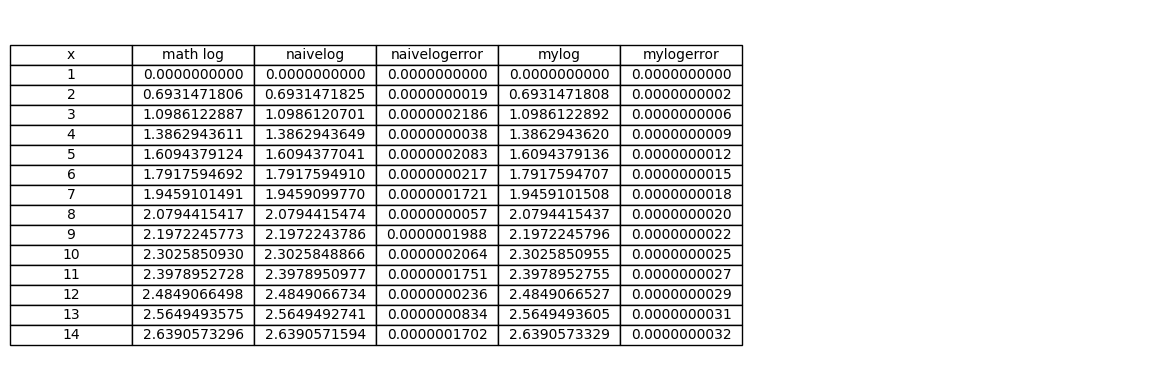

For n = 35:


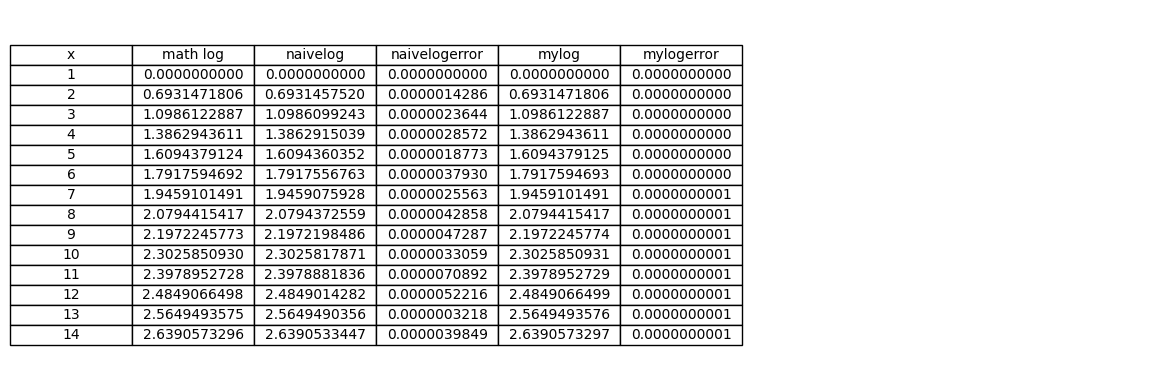

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def naivelogN(x, n): # I will rewrite the two functions to accept a second parameter to simplify running the functions on different n values.
    y = x
    for i in range(n):
        y = math.sqrt(y)
    l = y - 1
    for i in range(n):
        l = l * 2
    return l

def mylogN(x, n):
    z = x - 1
    for i in range(n):
        z = z / (1 + math.sqrt(1 + z))
    l = z
    for i in range(n):
        l = l * 2
    return l

test_values = list(range(1, 15)) # Define the numbers to be tested, along with the desired n values
n_values = [15, 20, 25, 30, 35]

# We perform the 3 log operations and 2 error caclulations on 1-14 for each desired n value. 
for n in n_values:
    print(f"For n = {n}:")

    # We will store the values we obtain in arrays.
    naivelog_values = []
    naivelogerror_values = []
    mylog_values = []
    mylogerror_values = []
    mathlog_values = []

    for t in test_values:
        mathlog = math.log(t)
        # Limit all appended values to 10 decimal places to reduce clutter when displaying. However, note that we use whole values
        # when calculating.
        mathlog_values.append('%.10f' % (mathlog))

        naivelog_result = naivelogN(t, n)
        naivelogerror_result = abs(mathlog - naivelog_result)
        naivelog_values.append('%.10f' % (naivelog_result))
        naivelogerror_values.append('%.10f' % (naivelogerror_result))

        mylog_result = mylogN(t, n)
        mylogerror_result = abs(mathlog - mylog_result)
        mylog_values.append('%.10f' % (mylog_result))
        mylogerror_values.append('%.10f' % (mylogerror_result))

    # Create a table for the values computed above.
    table_data = [[x, mathlog, naivelog, naivelogerror, mylog, mylogerror] for x, mathlog, naivelog, naivelogerror, mylog, mylogerror
                  in zip(test_values, mathlog_values, naivelog_values, naivelogerror_values, mylog_values, mylogerror_values)]

    # Create a subplot for the table
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Hide the axes for subplots, so we don't have random floating axes
    axs[0].axis('off')
    axs[1].axis('off')

    # Formatting the table before displaying
    table = axs[0].table(cellText=table_data, colLabels=['x', 'math log', 'naivelog', 'naivelogerror', 'mylog', 'mylogerror'],
                         cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2, 1)

    # Show the 3 log computations and 2 error computations for 1-14 for the current n value
    plt.tight_layout()
    plt.show()


First, notice that as n increases, the naivelog  error is far more pronounced than the error of mylog. This tells us that naivelog is ultimately less accurate in approximating log(x) than mylog is. This makes sense when we consider that naivelog is essentially approximating an approximation of log(x) with the propety described in Part 1.i), whereas mylog is similar to a Taylor series, which is a well-known approximation of log(x). In addition, notice in the tables above, the error for mylog tends towards 0 as x$\rightarrow$0 and n$\rightarrow \infty$, whereas the same property does not hold for naivelog. Part of the reason for this is that mylog is not as vulnerable to C.O.L as naivelog is, as the denominator reduces the risk of operations ~ 0, whereas this is not the case in naivelog (where the square root will eventually tend to 0). Furthermore, mylog has less problems approximating log(x) for x values in the 0 $\leq$ x $\leq$ 1 range due to the stability of the numbers provided by taking z = x - 1 prior to the roots, whereas we do not have the same property in naivelog. 

**3. Implement functions for computing the exponential, sine, and cosine, following the same “argument halving” philosophy. Showcase your code with examples. Here note that for instance, for trigonometric functions the choice of the argument x = 1, 2, . . . , 14 is not so good. Instead, one might want to choose x = 0, 0.1, 0.2, . . . , 1.6, that is, x varies from 0 to just over π/2.**

In [4]:
test_values = list(range(1, 15)) # Test range for e^x

def myExp(x): # We will use the argument reduction (e^x = (...(((e^r)^2)^2)...)^2) method and use the Taylor series on e^r
    n = 15 # Truncate the series after the 15th term
    exp = 0 
    l = abs(x) # Work in absolute value for now, if negative, we will simply give the inverse.
    while l > 2: # We calculate how many powers of two we will need to apply afterwards.
        l = l/2
        exp += 1
    a = 1 # We set out answer to the base case for now.
    term = 1 # Preload first term
    for i in range(1, n): # Find the term equivalent to e^r by continuously adding the next x^n/n! term to the answer.
        term *= l / i # Find the next x^n/n! term.
        a += term # Add it to the answer
    for i in range(exp): # Now we square our answer for the number of times needed.
        a *= a
    if (x < 0): # If the initial input was negative, e^(-x) = 1/x, so return the inverse of our answer.
        return 1/a
    else: # Otherwise, the answer itself is correct.
        return a

print("myExp:", end=' ') # Print out the value of myExp versus math.exp. Truncate at 3 decimals to make it easier to read
for i in test_values:
    temp = '%.3f' % myExp(i)
    print(temp, end=' ')
print("\n")

print("Exp:  ", end=' ')
for i in test_values:
    temp = '%.3f' % math.exp(i)
    print(temp, end=' ')
print("\n")

for i in range(70):
    print("-", end=' ')
print("\n")

exp_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6] # Trig values to test

def mySin(x): # We will use the reduction form sinx = 2sin(x/2)sqrt(1-sin^2(x/2)) and calculate sin(x/2) using the Maclaurin series
    n = 15 # We truncate the series at the 15th term
    y = abs(x) % math.pi # First reduce x to 0 <= y <= pi
    l = y/2 # Then reduce further to 0 <= l <= pi/2 to meet reduction form mentioned above
    a = l - (l*l*l)/6 # We preload the first two terms to make the formula easier to work with (since the exponents and factorials are odd)
    term = l*l*l/6
    sign = 1 # The third term has to be added, and we will switch with each operation by multiplying this value by -1
    
    
    for i in range(2, 2*n, 2): # Since we are skipping exponents by 2, we have to take 2 steps at a time.
        term *= (l*l)/((2*i)*((2*i)+1)) # Ex. First iteration: term = l^3/3! -> l^3/3! * l^2/(4*5) = l^5/5!
        a += sign * term # Add or subtract term found above depending on current sign
        sign *= -1 # Flip to the opposite sign for next iteration
    if (x < 0 or (x % (2*math.pi) > math.pi)): # sin(-x) = -sin(x) or sin(x) = y (0 <= x < pi) <=> sin(x + pi) = -y.
        return -(2*a)*(math.sqrt(1 - a*a)) 
    else: # if 0 <= x < pi, return simply the reduction form
        return (2*a)*(math.sqrt(1 - a*a))

print("mySin:", end=' ') # Print out the value of mySin versus math.sin. Truncate at 5 decimals to make it easier to read
for i in exp_values:
    temp = '%.5f' % mySin(i)
    print(temp, end=' ')
print("\n")

print("Sin:  ", end=' ')
for i in exp_values:
    temp = '%.5f' % math.sin(i)
    print(temp, end=' ')
print("\n")

for i in range(70):
    print("-", end=' ')
print("\n")

def myCos(x): # We will use the reduction form cosx = 2cos^2(x/2)- 1 and calculate cos(x/2) using the Maclaurin series
    n = 15 # We truncate the series at the 15th term
    y = abs(x) % math.pi # First reduce x to 0 <= y <= pi
    l = y/2 # Then reduce further to 0 <= l <= pi/2 to meet reduction form mentioned above
    a = 1
    term = 1 # We preload the first term
    sign = -1 # Second term to be subtracted, we will then switch sign every operation 

    for i in range(1, 2*n, 2): # Step by 2 to simplify getting the term from x^n/n! -> x^(n+2)/(n+2)!
        term *= l*l/(i*(i+1)) # We get the next term (as shown just above)
        a += sign * term # Add/Subtract the term to the answer depending on the sign
        term *= -1 # Switch sign every operation

    if ((x % (2*math.pi)) >= (math.pi) and (x % (2*math.pi)) < (2*math.pi)): # If input is in third or fourth quadrant, we swap sign.
        return -(2*(a*a)-1)
    else:
        return 2*(a*a)-1 # Output reduction form

print("myCos:", end=' ') # Print out the value of myCos versus math.cos. Truncate at 5 decimals to make it easier to read
for i in exp_values:
    temp = '%.5f' % myCos(i)
    print(temp, end=' ')
print("\n")

print("Cos:  ", end=' ')
for i in exp_values:
    temp = '%.5f' % math.cos(i)
    print(temp, end=' ')
print("\n")

myExp: 2.718 7.389 20.086 54.598 148.413 403.429 1096.633 2980.958 8103.084 22026.466 59874.142 162754.791 442413.391 1202604.278 

Exp:   2.718 7.389 20.086 54.598 148.413 403.429 1096.633 2980.958 8103.084 22026.466 59874.142 162754.791 442413.392 1202604.284 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

mySin: 0.09983 0.19867 0.29552 0.38942 0.47943 0.56464 0.64422 0.71736 0.78333 0.84147 0.89121 0.93204 0.96356 0.98545 0.99750 0.99957 

Sin:   0.09983 0.19867 0.29552 0.38942 0.47943 0.56464 0.64422 0.71736 0.78333 0.84147 0.89121 0.93204 0.96356 0.98545 0.99749 0.99957 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

myCos: 0.99500 0.98007 0.95534 0.92106 0.87758 0.82534 0.76484 0.69671 0.62161 0.54030 0.45360 0.36236 0.26750 0.16997 0.07074 -0.02920 

Cos:   0.99500 0.98007 0.95534 0.92106 0

**4. Design and implement an “argument halving” function for computing the arctangent. Showcase your code. Try to compute π with your code.**

In [5]:
def myArctan(x): # Using doubling formula(argument halving) and arctangent series from (PS - Section 6)
    n = 15 # Used to truncate series after 15th term and also to halve the argument into the range |x| < 1, as required (PS 107)
    z = x
    for i in range(n): # Reduce the argument into |x| < 1, using the doubling formula (PS 110)
        z = z/(1 + math.sqrt(1 + (z*z)))

    a = z
    sign = -1
    term = z # Preload first term of arctangent series
    for i in range(1, n): # The calculation of the arctangent series for z starts here
        term = z * (z*z) # Find numerator of next tirm first (not as easy to derive the denominator with this formula)
        a += sign*(term/(2*i + 1)) # Add/Subtract the term (with denominator added) depending on current sign
        sign *= -1 # Flip sign for next operation

    for i in range(n): # Doubling formula requires we double every time we reduce (hence we double 15 times)
        a *= 2

    return a 

print("myArctan(pi):  ",  myArctan(math.pi)) # Print out the result of my argument halving arctangent for pi and math.atan(pi).
print("math.atan(pi): ", math.atan(math.pi))

myArctan(pi):   1.262627255932705
math.atan(pi):  1.2626272556789115


<h1><center>Part 2</center></h1>

**In this exercise, we will implement the shift-and-add (or CORDIC) type algorithm for
computing trigonometric functions as we have seen in class. Every time you implement a code, showcase your code by examples.**
<br>

**1. Implement the algorithm for computing the tangent function. Do not forget to reduce the argument from a general value to a value between 0 and π/2. The pre-stored look-up table values should be computed by your own code for computing the arctangent from Part 1.**

In [6]:
lookupTable = [myArctan(2**(-i)) for i in range(15)] # Preload values of lookup table. Working in binary, so find for values 2^{-i}

def cordicTan(theta):
    x = 1.0 # Preset x, y as given in class
    y = 0.0
    negate = False # Condition to be set to be true if theta < 0 or if theta is in 2nd or 4th quadrant
    if (theta < 0):
        negate = True
    angle = abs(theta) % (2*math.pi) # First we reduce the argument to be within [0, 2pi]
    invert = False

    # We will reduce all angles to [0, pi/2] depending on quadrant
    if (angle >= math.pi/2 and angle < math.pi): # If the angle is in quad2, use the property tan((pi/2) - x) = tan(x). Requires neg. and inv.
        angle = abs(angle - math.pi/2)
        invert = True
    if (angle >= math.pi and angle < 3*math.pi/2): # If the angle is in quad3, use the property that tan(pi + x) = tan(x).
        angle -= math.pi
    if (angle >= 3*math.pi/2): #If the angle is in quad2, use the property tan((3pi/2) - x) = tan(x). Requires neg. and inv.
        angle = abs(angle - 3*math.pi/2)
        invert = True

    for i in range(15): # For each preloaded value
        sign = 1 if angle >= 0 else -1 # Determined which direction our rotation has to be in
        term = sign * (2 ** -i) # Find what the rotation will be, generally
        
        xNew = x - (y * term) # Find the next x and y values (Egbert 18)
        yNew = y + (x * term)
        
        angle -= sign * lookupTable[i] # Subtract the arcsin(i) from the angle (also Egbert 18)
        x = xNew 
        y = yNew

    if (invert == True): # If we had to invert it, it also means it must be negated. Hence, -1/(y/x) = -x/y.
        return -x/y
    elif (negate == True):
        return -y/x
    else:
        return y / x

print("cordicTan:", end=' ') # Print out the value of myCos versus math.cos. Truncate at 5 decimals to make it easier to read
for i in exp_values:
    temp = '%.5f' % cordicTan(i)
    print(temp, end=' ')
print("\n")

print("True Tan: ", end=' ')
for i in exp_values:
    temp = '%.5f' % math.tan(i)
    print(temp, end=' ')
print("\n")

cordicTan: 0.10030 0.20275 0.30931 0.42282 0.54628 0.68421 0.84227 1.02970 1.26007 1.55755 1.96470 2.57252 3.60205 5.79982 14.10202 -34.27183 

True Tan:  0.10033 0.20271 0.30934 0.42279 0.54630 0.68414 0.84229 1.02964 1.26016 1.55741 1.96476 2.57215 3.60210 5.79788 14.10142 -34.23253 



**2. Taking the above code as a foundation, implement now functions for computing the sine and cosine.**

In [7]:
def cordicSin(x):
    angle = x % (2*math.pi)
    tan = cordicTan(angle) # Find the tan value associated with the angle reduced to [0, 2pi]
    
    # Using formula from Egbert 18)
    if (angle >= math.pi/2 and angle < 3*math.pi/2): # If in quad 2/3, we will have to reverse sign as the tan mixes it up
        return -tan/(math.sqrt(1 + (tan*tan)))
    else:
        return tan/(math.sqrt(1 + (tan*tan)))

def cordicCos(x):
    angle = x % (2*math.pi)
    cot = 1/cordicTan(angle) # Find the cot value associated with the angle reduced to [0, 2pi]
    
    # Using formula from Egbert 18)
    if (angle >= math.pi): # If in quad 3/4, we will have to reverse sign as the cot mixes it up
        return -cot/(math.sqrt(1 + (cot*cot)))
    else:
        return cot/(math.sqrt(1 + (cot*cot)))


print("cordicSin:", end=' ') # Print out the value of cordicTan versus math.tan. Truncate at 5 decimals to make it easier to read
for i in exp_values:
    temp = '%.5f' % cordicSin(i)
    print(temp, end=' ')
print("\n")

print("True Sin: ", end=' ')
for i in exp_values:
    temp = '%.5f' % math.sin(i)
    print(temp, end=' ')
print("\n")

for i in range(70):
    print("-", end=' ')
print("\n")

print("cordicCos:", end=' ') # Print out the value of cordicTan versus math.tan. Truncate at 5 decimals to make it easier to read
for i in exp_values:
    temp = '%.5f' % cordicCos(i)
    print(temp, end=' ')
print("\n")

print("True Cos: ", end=' ')
for i in exp_values:
    temp = '%.5f' % math.cos(i)
    print(temp, end=' ')
print("\n")

cordicSin: 0.09980 0.19871 0.29549 0.38944 0.47941 0.56468 0.64421 0.71738 0.78331 0.84149 0.89120 0.93206 0.96356 0.98546 0.99750 0.99957 

True Sin:  0.09983 0.19867 0.29552 0.38942 0.47943 0.56464 0.64422 0.71736 0.78333 0.84147 0.89121 0.93204 0.96356 0.98545 0.99749 0.99957 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

cordicCos: 0.99501 0.98006 0.95534 0.92105 0.87759 0.82531 0.76485 0.69669 0.62164 0.54027 0.45361 0.36231 0.26750 0.16991 0.07073 -0.02917 

True Cos:  0.99500 0.98007 0.95534 0.92106 0.87758 0.82534 0.76484 0.69671 0.62161 0.54030 0.45360 0.36236 0.26750 0.16997 0.07074 -0.02920 



**3. Implement a function for computing the arctangent.**

In [10]:
lookupTable2 = [myArctan(2**(-i)) for i in range(15)] # Create a preloaded table, will be used for equation 2 (Egbert 23)

def cordicArctan(theta):
    x = 1.0 # Define X and Y as outlined in Egbert 22
    y = abs(theta)
    angle = 0 # Set the initial angle sum to 0

    for i in range(15):
        sign = 1 if y >= 0 else -1 # Determine the direction we will rotate based on Y_2 (Egbert 23)
        
        xNew = x + (y * sign * 2**(-i)) # Use equation 1 for the rotations we need to do (Egbert 23)
        yNew = y - (x * sign * 2**(-i))

        angle += sign * lookupTable2[i] # Determine the amount of the rotation (Egbert 23)
        x = xNew
        y = yNew
    if (theta < 0): # If the initial theta was negative, the overall answer should be too
        angle *= -1
    return angle # This is arctan value associated with the input theta, so return

print("cordicArctan:", end=' ') # Print out the value of cordicArctan vs math.atan to compare. Truncate at 5 decimals for an easier read.
for i in exp_values:
    temp = '%.5f' % cordicArctan(i)
    print(temp, end=' ')
print("\n")

print("True Arctan: ", end=' ')
for i in exp_values:
    temp = '%.5f' % math.atan(i)
    print(temp, end=' ')
print("\n")

cordicArctan: 0.09972 0.19735 0.29143 0.38050 0.46361 0.54037 0.61067 0.67474 0.73282 0.78538 0.83297 0.87606 0.91510 0.95061 0.98283 1.01224 

True Arctan:  0.09967 0.19740 0.29146 0.38051 0.46365 0.54042 0.61073 0.67474 0.73282 0.78540 0.83298 0.87606 0.91510 0.95055 0.98279 1.01220 



In [9]:
def cordicArcsin(x):
    return cordicArctan(x/(math.sqrt(1 - x*x))) # We use the formula given by Egbert 22 to calculate arcsin from arctan.
asin_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #Only defined for -1 < x < 1, excl. 1 to avoid division by 0 error 

print("cordicArcsin:", end=' ') # Test cordicArcsin for values and compare to the gold standard asin. Truncate at 10 dec. for readability.
for i in asin_values:
    temp = '%.10f' % cordicArcsin(i)
    print(temp, end=' ')
print("\n")

print("True Arcsin: ", end=' ')
for i in asin_values:
    temp = '%.10f' % math.asin(i)
    print(temp, end=' ')
print("\n")

cordicArcsin: 0.1002061542 0.2013624912 0.3047331297 0.4114993325 0.5236438642 0.6434881861 0.7754056062 0.9273081408 1.1197636867 

True Arcsin:  0.1001674212 0.2013579208 0.3046926540 0.4115168461 0.5235987756 0.6435011088 0.7753974966 0.9272952180 1.1197695150 

